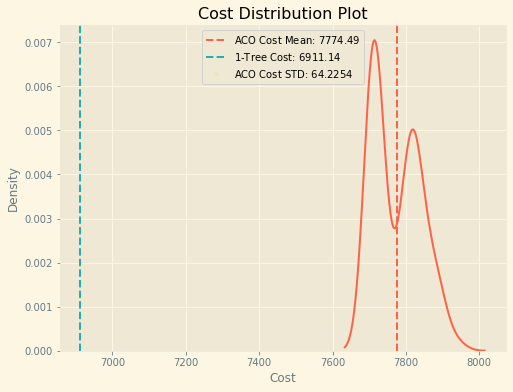

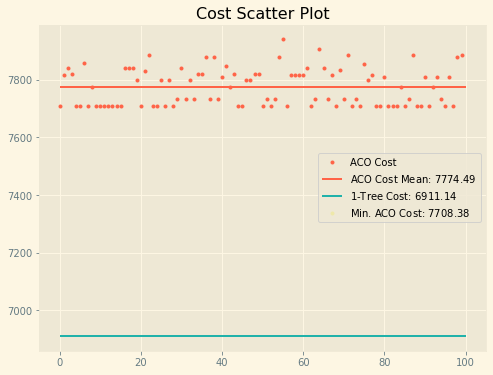

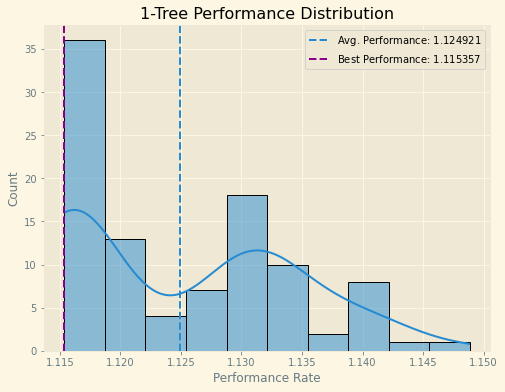

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('Solarize_Light2')

def plot_cost_dist(aco_costs, one_tree_cost):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.kdeplot(aco_costs, color='tomato')
    ax.axvline(x=np.mean(aco_costs), color='tomato', linestyle='--', label=f'ACO Cost Mean: ${np.mean(aco_costs):.2f}$')
    ax.axvline(x=one_tree_cost, color='lightseagreen', linestyle='--', label=f'1-Tree Cost: ${one_tree_cost:.2f}$')
    plt.plot([], [], '.', color='palegoldenrod', label=f'ACO Cost STD: ${np.std(aco_costs):.4f}$')
    plt.xlabel('Cost')
    plt.title('Cost Distribution Plot')
    plt.legend()
    plt.show()

def plot_cost_line(aco_costs, one_tree_cost):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(aco_costs, '.', color='tomato', label='ACO Cost')
    ax.hlines(y=np.mean(aco_costs), xmin=0, xmax=100, color='tomato', linestyle='-', label=f'ACO Cost Mean: ${np.mean(aco_costs):.2f}$')
    ax.hlines(y=one_tree_cost, xmin=0, xmax=100, color='lightseagreen', linestyle='-', label=f'1-Tree Cost: ${one_tree_cost:.2f}$')
    plt.plot([], [], '.', color='palegoldenrod', label=f'Min. ACO Cost: ${np.min(aco_costs):.2f}$')
    plt.title('Cost Scatter Plot')
    plt.legend(loc='center right')
    plt.show()

def plot_dist(aco_costs, one_tree_cost):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(aco_costs/one_tree_cost, kde=True, bins=10)
    ax.axvline(x=np.mean(aco_costs/one_tree_cost), linestyle='--', label=f'Avg. Performance: ${np.mean(aco_costs/one_tree_cost):.6f}$')
    ax.axvline(x=np.min(aco_costs/one_tree_cost), color='darkmagenta', linestyle='--', label=f'Best Performance: ${np.min(aco_costs/one_tree_cost):.6f}$')
    plt.title('1-Tree Performance Distribution')
    plt.xlabel('Performance Rate')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Open the file for reading
with open("graph_20_100.txt", "r") as file:
    # Read the first four lines of the file
    n = int(file.readline())
    mst_cost = float(file.readline())
    one_tree_cost = float(file.readline())
    params = [float(x) for x in file.readline().split()]

    # Create an empty list to store the points
    points = []

    # Read the rest of the lines in the file
    for line in file:
        # Split the line into two coordinates
        x, y = map(float, line.split())
        # Add the coordinates as a tuple to the points list
        points.append((x, y))

aco_costs = []
with open('costs_20_100.txt', 'r') as f:
    # Read each line and store the numbers in a list
    aco_costs = [float(line.strip()) for line in f]


paths = []

with open('paths_20_100.txt', 'r') as f:
    # Read each line and split the numbers
    lines = [line.strip().split() for line in f]
    for line in lines:
        edges = []
        for i in range(len(line)-1):
            edges.append((int(line[i]), int(line[i+1])))     
        # Create an edge between the last and first node to close the loop
        edges.append((int(line[-1]), int(line[0])))
        paths.append(edges)

best_path_edges = paths[np.argmin(aco_costs)]

# Convert the list to a numpy array
aco_costs = np.array(aco_costs)

plot_cost_dist(aco_costs, one_tree_cost)
plot_cost_line(aco_costs, one_tree_cost)
plot_dist(aco_costs, one_tree_cost)

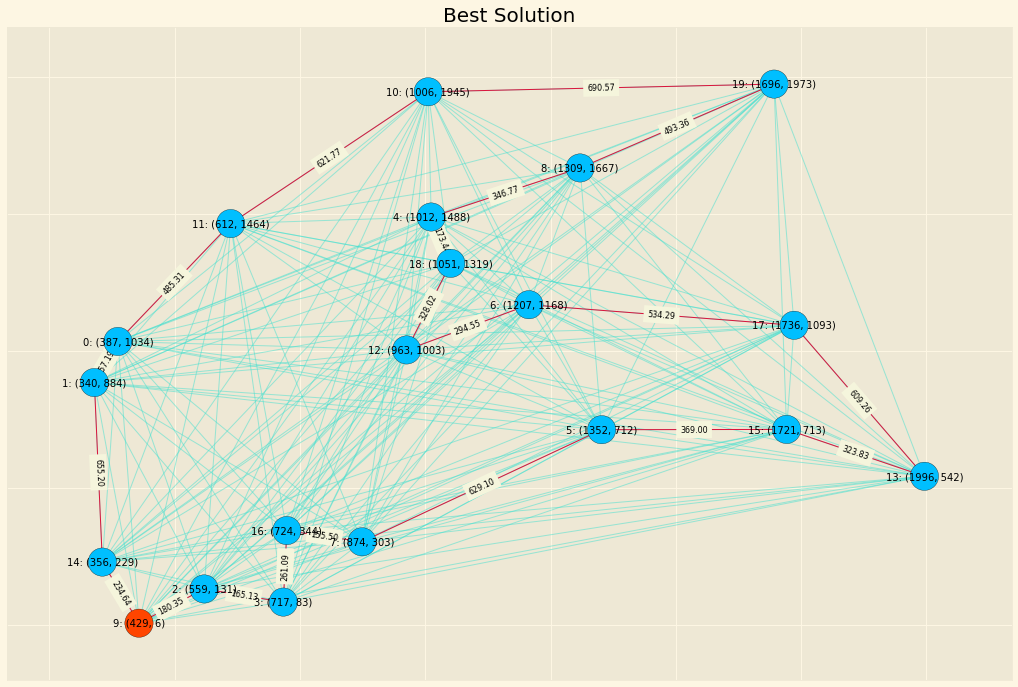

In [133]:
import networkx as nx

distance = lambda p1, p2: np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

# Example array of nodes as tuples (x, y)
nodes = points

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with positions
pos = {}
for i, node in enumerate(nodes):
    G.add_node(i)
    pos[i] = node

# Add edges to create a complete graph
n_nodes = len(nodes)
for i in range(n_nodes):
    for j in range(i+1, n_nodes):
        G.add_edge(i, j)

best_path = nx.Graph()
best_path.add_edges_from(best_path_edges)

for u, v in best_path.edges():
    best_path.edges[u, v]['weight'] = distance(points[u], points[v])

best_path_start_node = best_path_edges[0][0]
node_color = ['orangered' if i == best_path_start_node else 'deepskyblue' for i in range(n_nodes)]

# Draw the graph
fig = plt.figure(figsize=(18, 12))
nx.draw_networkx_nodes(G, pos=pos, node_size=800, node_color=node_color, linewidths=0.3, edgecolors='black')
nx.draw_networkx_edges(G, pos, alpha=0.500, edge_color='turquoise')
nx.draw_networkx_edges(best_path, pos=pos, edge_color='crimson')
labels = { i : f'{i}: {int(p[0]), int(p[1])}' for i, p in enumerate(nodes) }
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10, labels=labels)
edge_labels = nx.get_edge_attributes(best_path, 'weight')
edge_labels = { k : f'{v:.2f}' for k, v in edge_labels.items() }
nx.draw_networkx_edge_labels(best_path, pos, edge_labels=edge_labels, font_size=8, bbox=dict(facecolor='beige', edgecolor='none'))
plt.title('Best Solution', fontdict={'fontsize': 20})
plt.show()